# Ch02.09. Seborn 실습 - tip 데이터


---

* 날짜:2020-04-21
* 이름:안창덕


## 학습내용

    - Catplot을 이용해 범주별 데이터의 분포를 시각화 한다.
    - Catplot의 다양한 시각화 종류를 알아본다.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
tips = sns.load_dataset('tips')
tips.head()
```

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### | 데이터 기본 탐색


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


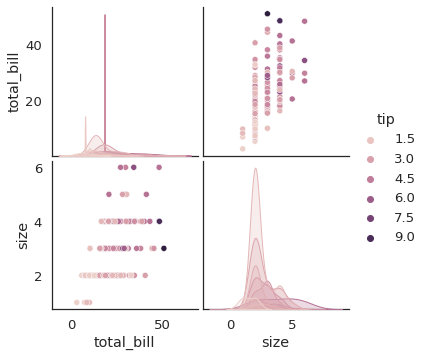

In [9]:
sns.pairplot(tips, hue='tip')
plt.show()

### (2) Categorical plot 범주형 자료를 나타내는 그래프들

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.catplot(x=None, y=None, 
                hue=None, data=None,
                kind = 'strip' # {swarm, box, violin, boxen, point, bar, count} 
                row=None, col=None, 
                col_wrap=None, 
                units=None, seed=None, order=None,
                hue_order=None, row_order=None, 
                col_order=None, height=5, 
                aspect=1, orient=None, color=None, 
                palette=None, legend=True, 
                legend_out=True, 
                sharex=True, sharey=True, 
                margin_titles=False,
                facet_kws=None,
                jitter=True)

```

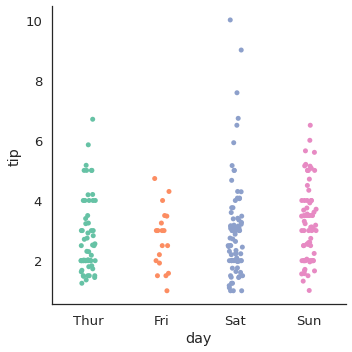

In [10]:
sns.catplot(data=tips, x='day', y='tip') 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


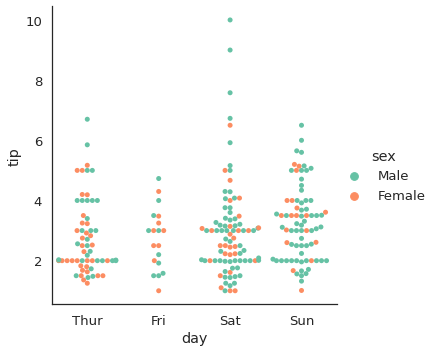

In [14]:
sns.catplot(data=tips, x='day', y='tip', 
            kind='swarm',
            hue='sex') 

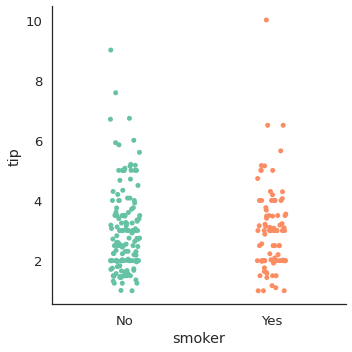

In [16]:
#흡연 여부에 따라 팁의 분포 그리기
sns.catplot(data=tips, x='smoker', y='tip',
            order=['No', 'Yes']) # x카테고리의 순서를 정할 수 있음

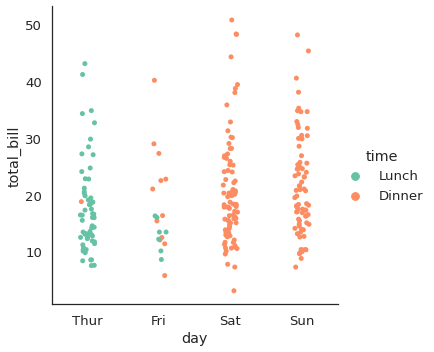

In [19]:
#요일별로 토탈 빌  그리기 -> 시간별 색깔따로
sns.catplot(data=tips, x='day', y='total_bill',
            hue='time')
plt.show()

#### | 플롯 분할



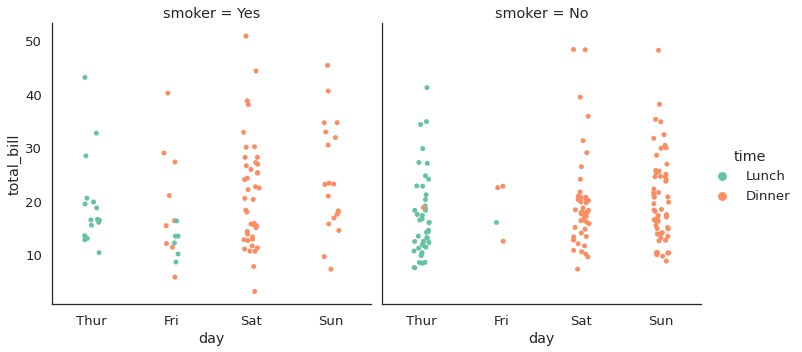

In [20]:
sns.catplot(data=tips, x='day', y='total_bill',
            hue='time',
            col='smoker')
plt.show()

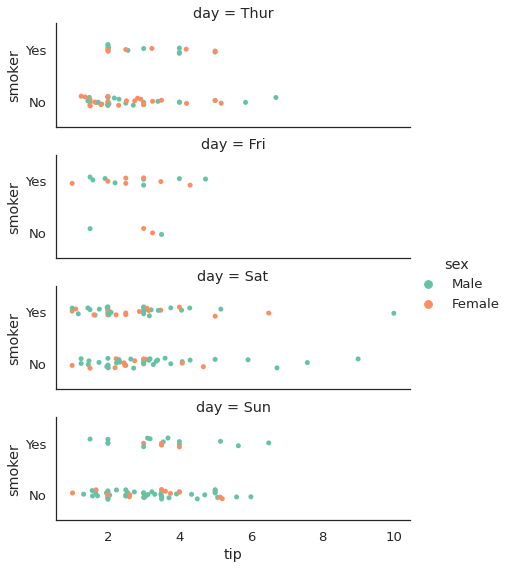

In [25]:
#수평 플롯
sns.catplot(data=tips, x='tip', y='smoker',
            row='day',
            height=2, aspect=3,
            hue='sex')
plt.show()

### (3) 범주별 통계 시각화



#### | Bar plots


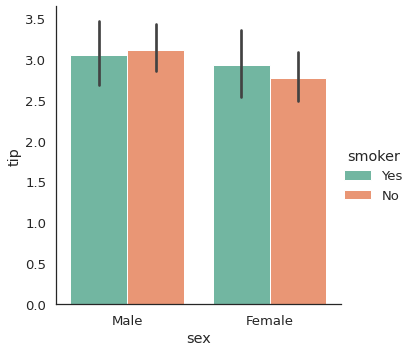

In [30]:
sns.catplot(data=tips, x='sex', y='tip',
            kind = 'bar',
            hue='smoker')
plt.show()

In [32]:
tips.day

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

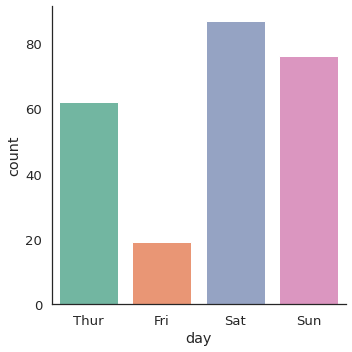

In [31]:
sns.catplot(data=tips, x='day', 
            kind = 'count')
plt.show()

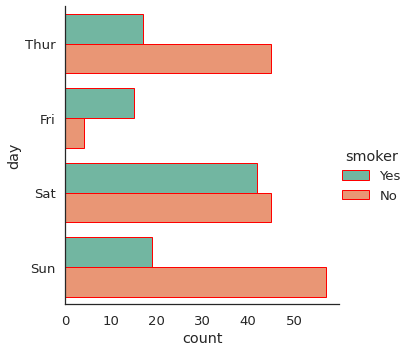

In [36]:
sns.catplot(data=tips, y='day', 
            kind = 'count',
            hue='smoker',
            edgecolor='r')
plt.show()

#### | Point plots



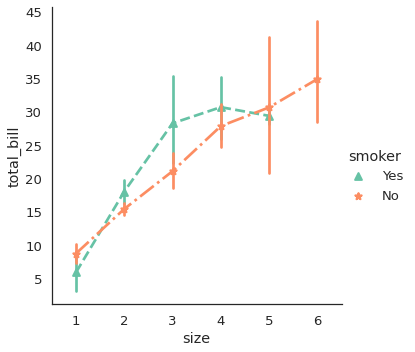

In [44]:
sns.catplot(data=tips, x='size', y='total_bill',
            kind = 'point',
            hue='smoker',
            linestyles=['--','-.'],
            markers=['^','*']) 
plt.show()

### (4) 범주별 분포 시각화


#### | Box plots


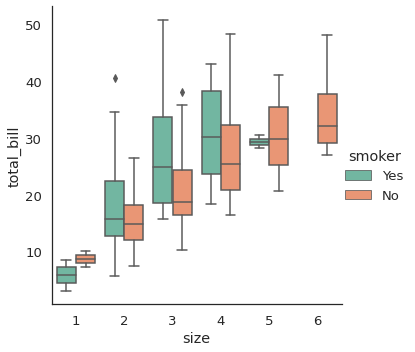

In [46]:
sns.catplot(data=tips, x='size', y='total_bill',
            kind = 'box',
            hue='smoker',
            ) 
plt.show()

#### | Violin plots

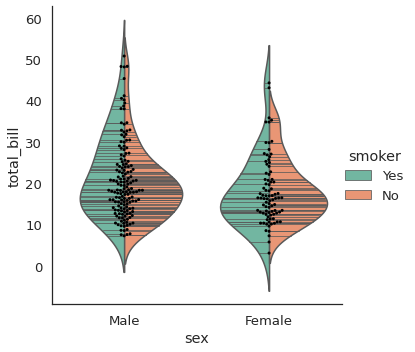

In [58]:
g = sns.catplot(data=tips, x='sex', y='total_bill',
            kind = 'violin',
            hue='smoker',
            split=True, #합치기
            inner='stick') #데이터가 분포하는곳에 표시
sns.swarmplot(data=tips, x='sex', y='total_bill', color='k', size=3, ax=g.ax) #ax는 catplot 옵션에선 못씀
plt.show()


## **과제: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('titanic')
df.head()
```

In [50]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### | 데이터 기본 탐색


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [52]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [64]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

### (2) Categorical plot


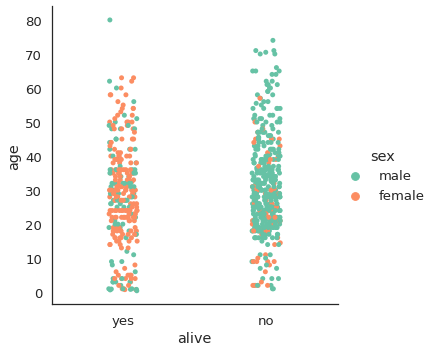

In [63]:
sns.catplot(data=df, x='alive', y='age', hue='sex', order=['yes','no'])
            

#### | 플롯 분할


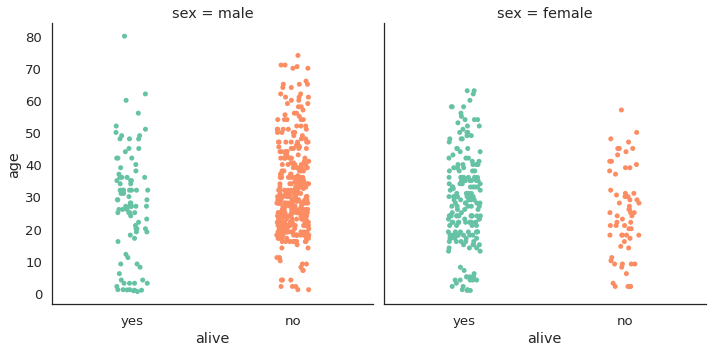

In [65]:
sns.catplot(data=df, x='alive', y='age', order=['yes','no'], col='sex')

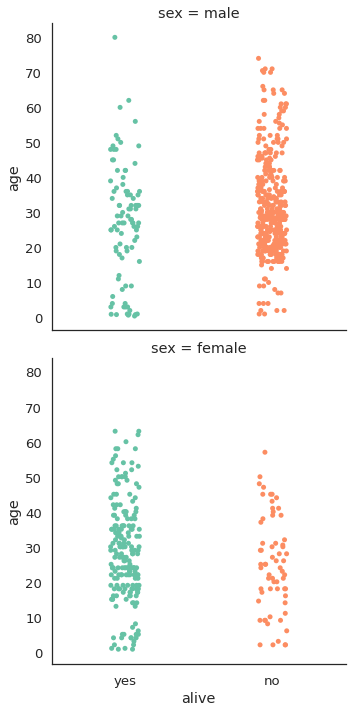

In [99]:
sns.catplot(data=df, x='alive', y='age', order=['yes','no'], row='sex')

### (3) 범주별 통계 시각화


#### | Bar plots

In [67]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [87]:
df['alone'].unique()

array([False,  True])

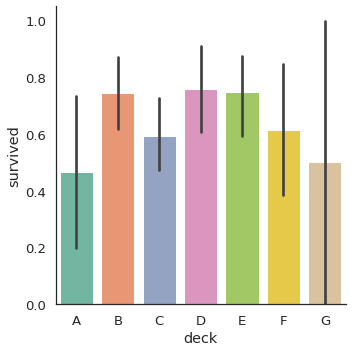

In [103]:
sns.catplot(data=df, x='deck', y='survived', kind='bar')

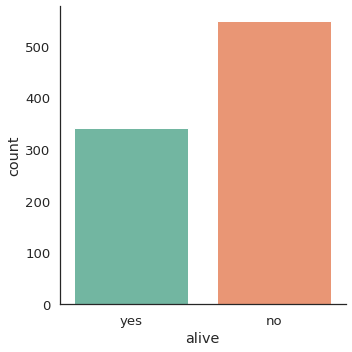

In [105]:
sns.catplot(data=df, x='alive', kind='count', order=['yes','no'])

#### | Point plots



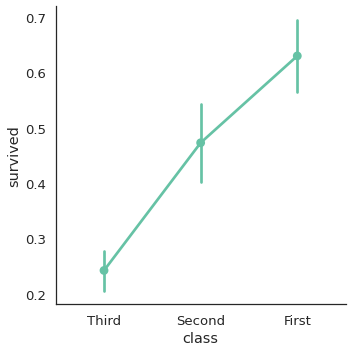

In [91]:
sns.catplot(data=df, x='class', y='survived', kind='point', order=['Third', 'Second', 'First'])

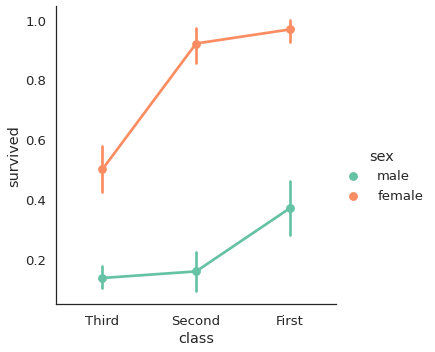

In [106]:
sns.catplot(data=df, x='class', y='survived', kind='point', order=['Third', 'Second', 'First'], hue='sex')

### (4) 범주별 분포 시각화


#### | Box plots


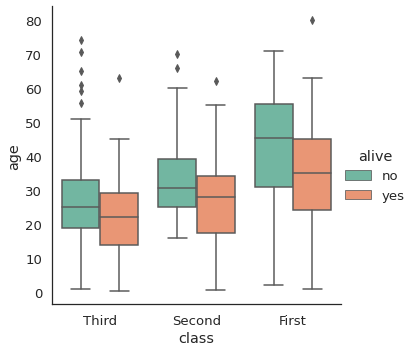

In [93]:
sns.catplot(data=df, x='class', y='age', kind='box', order=['Third', 'Second', 'First'], hue='alive')

#### | Violin plots

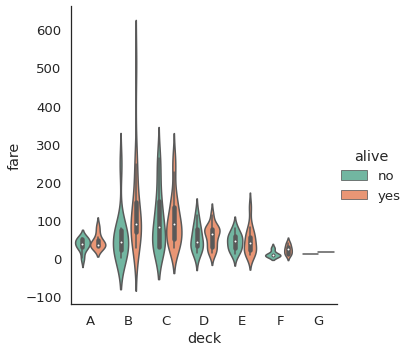

In [98]:
sns.catplot(data=df, x='deck', y='fare', kind='violin', hue='alive')

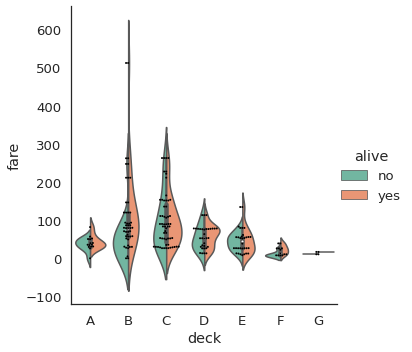

In [111]:
h = sns.catplot(data=df, x='deck', y='fare', kind='violin', hue='alive', split=True)
sns.swarmplot(data=df, x='deck', y='fare', color='k', size=2, ax=h.ax)